<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/tmpPatients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Jun 18 02:11:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!apt-get install default-jre
!java -version

!pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
     |████████████████████████████████| 128.3MB 1.2MB/s 
  Created wheel for h2o: filename=h2o-3.30.0.4-py2.py3-none-any.whl size=128397038 sha256=4122b21b034c196550967cf6829f0ddde25407971fd46970542eff3c1e1f9d85
  Stored in directory: /root/.cache/pip/wheels/ad/bd/cc/0a8c7dffc4772df0bbfae4c1c7a9d64525fcd3ada9694dd8c3
Successfully built h2o


In [5]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprztv26v4
  JVM stdout: /tmp/tmprztv26v4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprztv26v4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_4e00rx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
testeo=pd.read_csv('solar_test.csv')
entrenamiento=pd.read_csv('solar_train.csv')

In [ ]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24514 entries, 0 to 24513
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                24514 non-null  int64  
 1   Data                    24514 non-null  object 
 2   Time                    24514 non-null  object 
 3   Radiation               24514 non-null  float64
 4   Temperature             24514 non-null  int64  
 5   Pressure                24514 non-null  float64
 6   Humidity                24514 non-null  int64  
 7   WindDirection(Degrees)  24514 non-null  float64
 8   Speed                   24514 non-null  float64
 9   TimeSunRise             24514 non-null  object 
 10  TimeSunSet              24514 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.1+ MB


In [ ]:
testeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8172 entries, 0 to 8171
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8172 non-null   int64  
 1   UNIXTime                8172 non-null   int64  
 2   Data                    8172 non-null   object 
 3   Time                    8172 non-null   object 
 4   Temperature             8172 non-null   int64  
 5   Pressure                8172 non-null   float64
 6   Humidity                8172 non-null   int64  
 7   WindDirection(Degrees)  8172 non-null   float64
 8   Speed                   8172 non-null   float64
 9   TimeSunRise             8172 non-null   object 
 10  TimeSunSet              8172 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 702.4+ KB


In [ ]:
testeo.drop(columns=('id'),inplace=True)

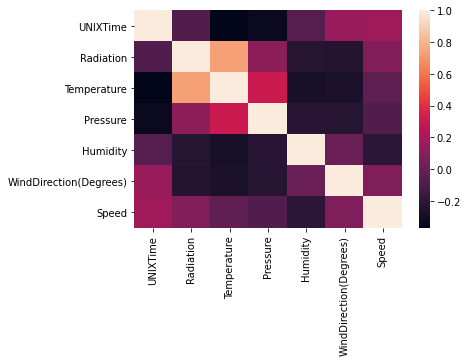

In [ ]:
sns.heatmap(entrenamiento.corr())

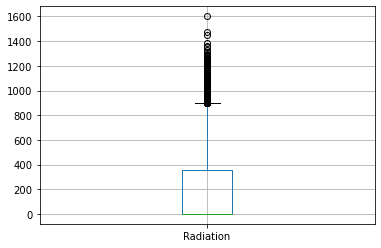

In [ ]:
entrenamiento.boxplot(column=['Radiation'])

In [ ]:
q1=np.percentile(entrenamiento.Radiation, 25)
q3=np.percentile(entrenamiento.Radiation, 75)

In [ ]:
iqr=q3-q1

upper=q3+3*iqr
lower=q1-3*iqr

In [ ]:

len(entrenamiento[entrenamiento.Radiation > upper])

3

In [ ]:
entrenamiento=entrenamiento[entrenamiento.Radiation < upper]
entrenamiento.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475175023,9/29/2016 12:00:00 AM,08:50:23,634.99,61,30.46,41,14.96,6.75,06:13:00,18:13:00
1,1481799902,12/15/2016 12:00:00 AM,01:05:02,1.27,37,30.26,70,207.43,5.62,06:50:00,17:46:00
2,1478339417,11/4/2016 12:00:00 AM,23:50:17,1.21,47,30.49,33,168.20,5.62,06:25:00,17:47:00
3,1472887208,9/2/2016 12:00:00 AM,21:20:08,1.67,54,30.46,101,152.60,3.37,06:07:00,18:37:00
4,1478724901,11/9/2016 12:00:00 AM,10:55:01,839.78,62,30.47,36,291.95,7.87,06:28:00,17:45:00


In [ ]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24511 entries, 0 to 24513
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                24511 non-null  int64  
 1   Data                    24511 non-null  object 
 2   Time                    24511 non-null  object 
 3   Radiation               24511 non-null  float64
 4   Temperature             24511 non-null  int64  
 5   Pressure                24511 non-null  float64
 6   Humidity                24511 non-null  int64  
 7   WindDirection(Degrees)  24511 non-null  float64
 8   Speed                   24511 non-null  float64
 9   TimeSunRise             24511 non-null  object 
 10  TimeSunSet              24511 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.2+ MB


In [ ]:
entrenamiento['Data']=pd.to_datetime(entrenamiento['Data'])

testeo['Data']=pd.to_datetime(testeo['Data'])

In [ ]:
entrenamiento['Time']=pd.to_datetime(entrenamiento['Time'])

testeo['Time']=pd.to_datetime(testeo['Time'])

In [ ]:
entrenamiento['Year']=entrenamiento['Data'].dt.year

testeo['Year']=testeo['Data'].dt.year

In [ ]:
entrenamiento['Month']=entrenamiento['Data'].dt.month

testeo['Month']=testeo['Data'].dt.month

In [ ]:
entrenamiento['Week']=entrenamiento['Data'].dt.week

testeo['Week']=testeo['Data'].dt.week

In [ ]:
entrenamiento['Day']=entrenamiento['Data'].dt.day

testeo['Day']=testeo['Data'].dt.day

In [ ]:
entrenamiento.drop(columns='Data',inplace=True)

testeo.drop(columns='Data',inplace=True)

In [ ]:
entrenamiento['Hour']=entrenamiento['Time'].dt.hour

testeo['Hour']=testeo['Time'].dt.hour

In [ ]:
entrenamiento['Minute']=entrenamiento['Time'].dt.minute

testeo['Minute']=testeo['Time'].dt.minute

In [ ]:
entrenamiento['Second']=entrenamiento['Time'].dt.second

testeo['Second']=testeo['Time'].dt.second

In [ ]:
entrenamiento.drop(columns='Time',inplace=True)

testeo.drop(columns='Time',inplace=True)

In [ ]:
entrenamiento.head(2)

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Year,Month,Week,Day,Hour,Minute,Second
0,1475175023,634.99,61,30.46,41,14.96,6.75,06:13:00,18:13:00,2016,9,39,29,8,50,23
1,1481799902,1.27,37,30.26,70,207.43,5.62,06:50:00,17:46:00,2016,12,50,15,1,5,2


In [ ]:
testeo.head(2)

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Year,Month,Week,Day,Hour,Minute,Second
0,1478720107,59,30.47,44,312.67,3.37,06:28:00,17:45:00,2016,11,45,9,9,35,7
1,1474063503,59,30.48,83,38.01,6.75,06:10:00,18:25:00,2016,9,37,16,12,5,3


In [ ]:
entrenamiento_clean.to_csv('Training_Clean.csv')

In [ ]:
testeo.to_csv('Testeo_Clean.csv')

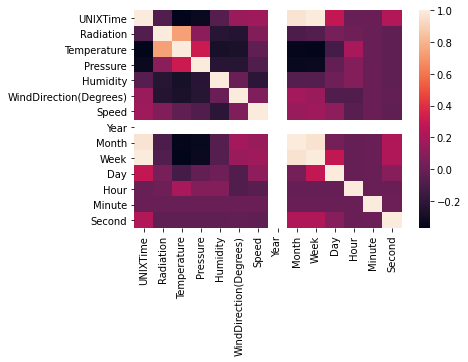

In [ ]:
sns.heatmap(entrenamiento.corr())

In [ ]:
entrenamiento.drop(columns=('Year'), inplace=True)

testeo.drop(columns=('Year'), inplace=True)

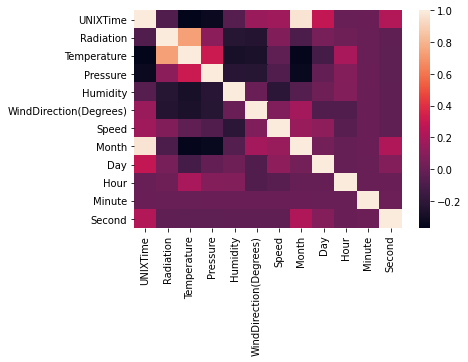

In [ ]:
sns.heatmap(entrenamiento.corr())

In [ ]:
entrenamiento.drop(columns=('Week'), inplace=True)

testeo.drop(columns=('Week'), inplace=True)

In [ ]:
entrenamiento.drop(columns=('UNIXTime'), inplace=True)

testeo.drop(columns=('UNIXTime'), inplace=True)

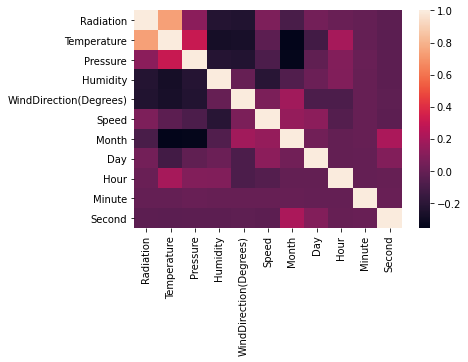

In [ ]:
sns.heatmap(entrenamiento.corr())

In [ ]:
#entrenamiento['TimeSunRise']=pd.to_datetime(entrenamiento['TimeSunRise'])
#entrenamiento['TimeSunSet']=pd.to_datetime(entrenamiento['TimeSunSet'])

#testeo['TimeSunSet']=pd.to_datetime(testeo['TimeSunSet'])
#testeo['TimeSunRise']=pd.to_datetime(testeo['TimeSunRise'])

In [ ]:
entrenamiento.to_csv('training_clean.csv')
testeo.to_csv('testing_clean.csv')

In [ ]:
training=pd.read_csv('training_clean.csv')
testing=pd.read_csv('testing_clean.csv')

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,5 hours 53 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_CÃ©sar_av5cdn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.965 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [ ]:
# parsear datos a h2o
train=h2o.import_file('training_clean.csv')
test=h2o.import_file('testing_clean.csv')

X=train.columns
y='Radiation'
X.remove(y)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
aml=H2OAutoML(max_models=10, seed=1)
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |█
23:11:09.45: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%


In [ ]:
lb=aml.leaderboard

lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200607_231108,6356.91,79.7302,6356.91,35.173,nan
StackedEnsemble_BestOfFamily_AutoML_20200607_231108,6415.42,80.0963,6415.42,35.714,nan
GBM_3_AutoML_20200607_231108,6657.73,81.5949,6657.73,36.803,nan
GBM_4_AutoML_20200607_231108,6689.38,81.7886,6689.38,36.5289,nan
DRF_1_AutoML_20200607_231108,6769.77,82.2786,6769.77,36.3843,0.63041
GBM_2_AutoML_20200607_231108,6819.72,82.5816,6819.72,38.3613,nan
XRT_1_AutoML_20200607_231108,6879.48,82.9426,6879.48,37.2615,0.642509
GBM_5_AutoML_20200607_231108,7078.13,84.1316,7078.13,40.4343,nan
GBM_1_AutoML_20200607_231108,7508.82,86.6534,7508.82,41.4967,nan
GBM_grid__1_AutoML_20200607_231108_model_1,9502.08,97.4786,9502.08,50.3281,nan


In [ ]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200607_231108

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 2014.6401980134397
RMSE: 44.884743488332866
MAE: 20.57419526533412
RMSLE: NaN
R^2: 0.9801180517236032
Mean Residual Deviance: 2014.6401980134397
Null degrees of freedom: 10020
Residual degrees of freedom: 10015
Null deviance: 1015645520.072211
Residual deviance: 20188709.42429268
AIC: 104694.09716288584

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 6356.91211747947
RMSE: 79.73024593891247
MAE: 35.17302159839641
RMSLE: NaN
R^2: 0.9362655304419911
Mean Residual Deviance: 6356.91211747947
Null degrees of freedom: 24510
Residual degrees of freedom: 24505
Null deviance: 2444971288.151738
Residual deviance: 155814272.9115393
AIC: 284223.336599685


In [ ]:
pred=aml.leader.predict(test)

pred.shape

stackedensemble prediction progress: |████████████████████████████████████| 100%


(8172, 1)

In [ ]:
pred_df=h2o.as_list(pred)

In [ ]:
pred_df.insert(0,'ID',pred_df.index)

In [ ]:
pred_df

,ID,predict
0,0,659.746862
1,1,874.630771
2,2,-0.299961
3,3,10.329457
4,4,-0.745673
...,...,...
8167,8167,416.209889
8168,8168,-3.892958
8169,8169,9.349084
8170,8170,-0.737382


In [ ]:
pred_df.rename(columns={'predict':'Radiation','ID':'id'},inplace=True)